<a href="https://colab.research.google.com/github/silvi-no26/c_vision/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Generate synthetic image with random blobs

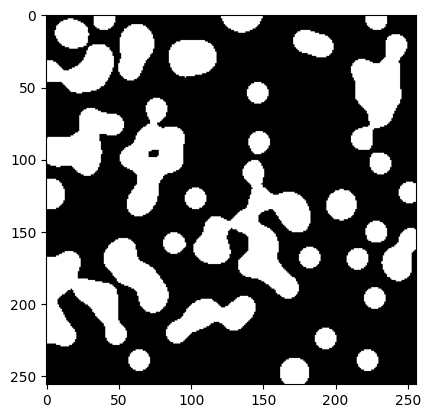

In [5]:
from skimage import data
import matplotlib.pyplot as plt

# Generate synthetic image with random blobs
synthetic_image = data.binary_blobs(length=256, blob_size_fraction=0.1, volume_fraction=0.3)

# Show the synthetic image
plt.imshow(synthetic_image, cmap='gray')
plt.show()

# 2. Object segmentation and labeling

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


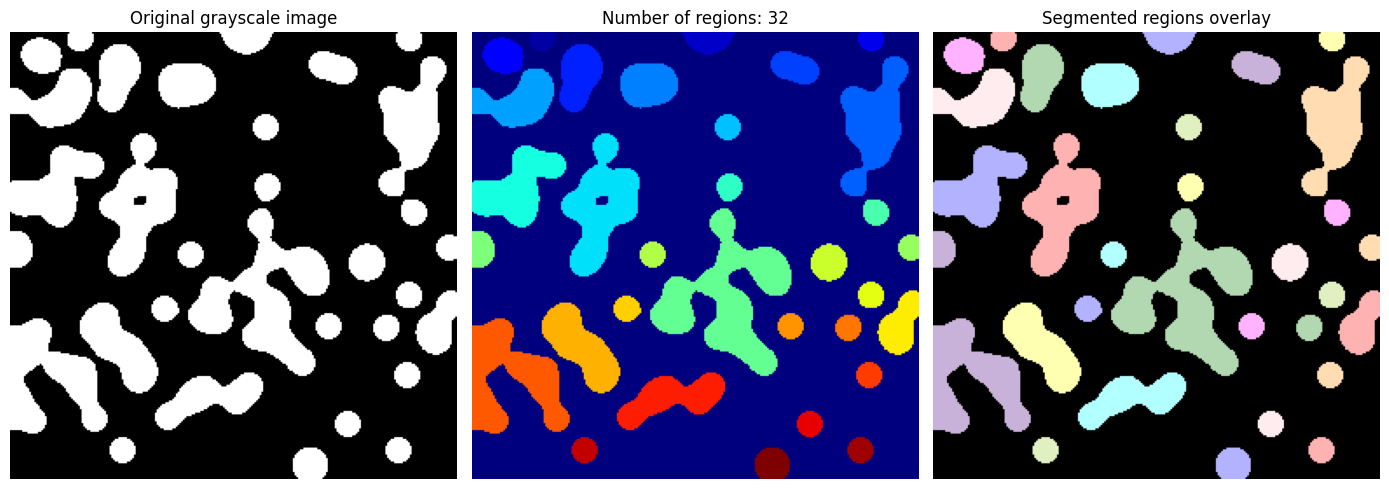

In [10]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage import data
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# If the image is grayscale:
IG = synthetic_image
# If the image has a single channel:
#IG = I.squeeze()

# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
bw = IG > thresh # keep lighter regions with grayscale intensities above threshold

# label image regions:
label_image, nregions = label(bw,return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

# 3. Get regional properties in a pandas dataframe

In [17]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity','extent','axis_major_length'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity,extent,axis_major_length
0,1,144.0,0.683019,0.872727,15.971067
1,2,287.0,0.886371,0.712159,29.079250
2,3,143.0,0.675717,0.866667,15.855055
3,4,383.0,0.533564,0.759921,24.030085
4,5,719.0,0.825968,0.737436,40.835965


Represent area of the blobs as a function of the major axis length

<Axes: xlabel='area', ylabel='axis_major_length'>

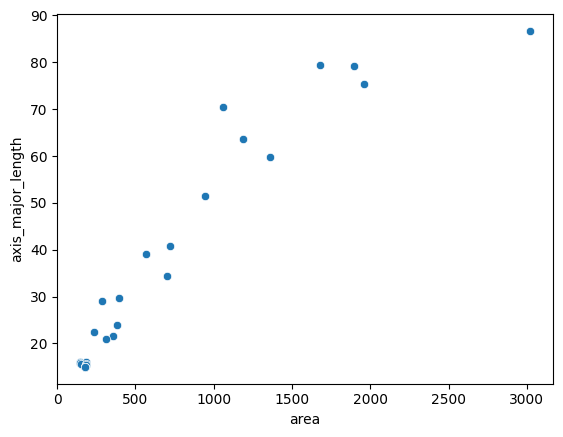

In [18]:
import seaborn as sns

sns.scatterplot(x='area',y='axis_major_length',data=df_features)

# 4. Analyze blobs

Since you have the feature data in a pandas dataframe, you can exploit all the functions of te libraries. For instance:

How many blobs have an area above the average?

In [24]:
avg_area = df_features['area'].mean()

df_aboveAv = df_features.loc[(df_features['area']>=avg_area)]

df_aboveAv.head()

,label,area,eccentricity,extent,axis_major_length
4,5,719.0,0.825968,0.737436,40.835965
6,7,1680.0,0.907011,0.538462,79.452452
7,8,702.0,0.648833,0.818182,34.355305
8,9,947.0,0.824745,0.592616,51.469785
10,11,1895.0,0.884678,0.513550,79.222097


In [27]:
print(df_aboveAv)

    label    area  eccentricity    extent  axis_major_length
4       5   719.0      0.825968  0.737436          40.835965
6       7  1680.0      0.907011  0.538462          79.452452
7       8   702.0      0.648833  0.818182          34.355305
8       9   947.0      0.824745  0.592616          51.469785
10     11  1895.0      0.884678  0.513550          79.222097
11     12  1358.0      0.812032  0.535067          59.858565
14     15  3023.0      0.459750  0.388760          86.699040
22     23  1187.0      0.918083  0.507265          63.638947
25     26  1961.0      0.636552  0.530574          75.367878
27     28  1059.0      0.943793  0.517595          70.513431


In [26]:
N_large = df_aboveAv.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,avg_area))

there are 10 blobs with an area larger or equal the mean area 614.53125


Represent the blobs that have an area smaller than the average blob's area

In [29]:
df_smallerAv = df_features.loc[(df_features['area']<avg_area)]
N_lower = df_smallerAv.shape[0]
print('there are {} blobs with an area smaller than the mean area {}'.format(N_lower,avg_area))

there are 22 blobs with an area smaller than the mean area 614.53125


find the labels of small and large blobs

In [34]:
indx_blobsover = df_aboveAv['label'].values

In [35]:
indx_blobsover

array([ 5,  7,  8,  9, 11, 12, 15, 23, 26, 28])

In [36]:
indx_bloblower = df_smallerAv['label'].values

In [37]:
indx_bloblower

array([ 1,  2,  3,  4,  6, 10, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25,
       27, 29, 30, 31, 32])

Create a binary mask with the large and small blobs

In [38]:
import numpy as np
mask_blobsover = np.isin(label_image,indx_blobsover)
mask_blobslower = np.isin(label_image,indx_bloblower)

Represent the large and small blobs

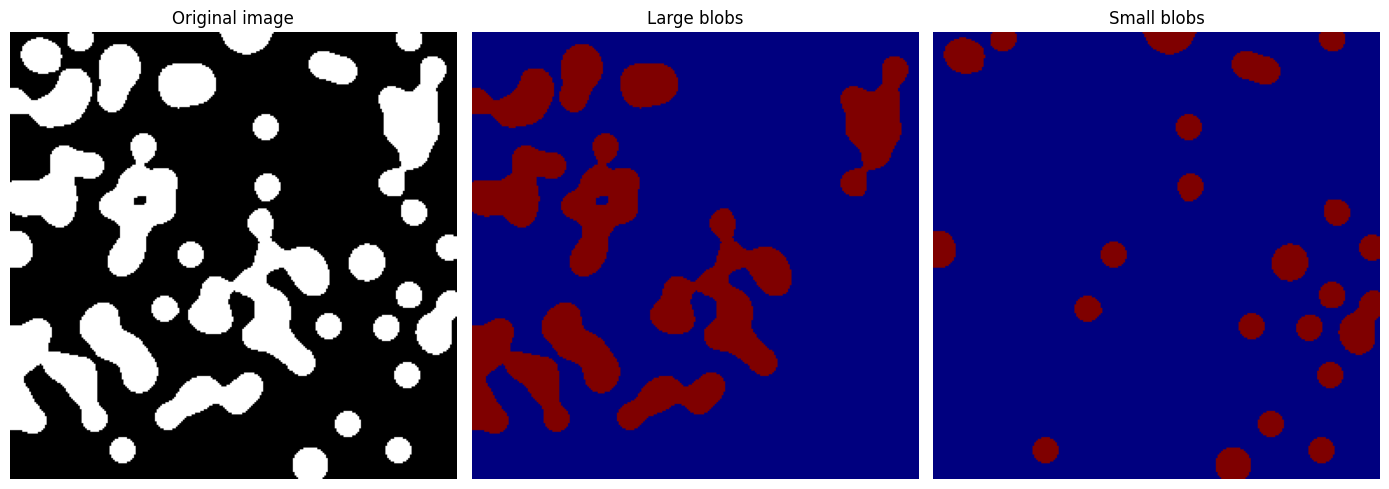

In [44]:
# Get some figures:
fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(synthetic_image,cmap='gray')
ax[0].set_title('Original image')
ax[1].imshow(mask_blobsover,cmap=plt.cm.jet)
ax[1].set_title('Large blobs')
ax[2].imshow(mask_blobslower,cmap=plt.cm.jet)
ax[2].set_title('Small blobs')
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

# 5. Obtain texture-based regional properties

In [47]:
from skimage.feature.texture import graycomatrix, graycoprops

image = np.array([[0, 0, 1, 1],[0, 0, 1, 1],[0, 2, 2, 2],[2, 2, 3, 3]], dtype=np.uint8)
g = graycomatrix(synthetic_image, [1], [0], levels=4, normed=False, symmetric=False)
print(image)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))

[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 44716
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 926
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from skimage.feature.texture import graycomatrix, graycoprops
from skimage.measure import regionprops
from skimage import data, img_as_ubyte

# Assume that `label_image` and `IG` are already defined
# IG should be a grayscale image of type uint8
# label_image is the label map of regions


IG = img_as_ubyte(synthetic_image)
props = regionprops(label_image,intensity_image=IG) # Obtain again the properties after removal of spourious regions

nregions = len(props)

iregion = 0
props_texture = np.zeros((nregions,5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = IG[minr:maxr, minc:maxc]

    # Convertir a uint8 y escalar valores si es necesario
    Iu8 = img_as_ubyte(I)

    # Calculate GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extract properties
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]


# Export to Excel file
df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df.to_excel("Texture_features.xlsx", index=False)
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,4222.402597,16.558442,0.935066,0.867801,0.651268
1,4001.538462,15.692308,0.938462,0.742386,0.842657
2,4644.642857,18.214286,0.928573,0.861596,0.626667
3,4981.211180,19.534161,0.923397,0.771300,0.770892
4,4515.625000,17.708333,0.930557,0.756206,0.808972
5,3549.122807,13.918129,0.945420,0.765427,0.849440
6,3229.860197,12.666118,0.950330,0.676631,0.899648
7,2735.426683,10.727163,0.957933,0.825949,0.848412
8,2702.445652,10.597826,0.958441,0.699663,0.911694
9,6192.857143,24.285714,0.904763,0.785758,0.678703
